Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [X] If you haven't completed assignment #1, please do so first.
- [X] Continue to clean and explore your data. Make exploratory visualizations.
- [X] Fit a model. Does it beat your baseline? 
- [X] Try xgboost.
- [X] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
# Imports
import pandas as pd
import numpy as np

# Create dataframe of project data
potholes = pd.read_csv('../../Unit 2 Build Week/Pothole Requests after 10.15.18.csv')

In [2]:
# Change output viewing options
pd.set_option('display.max_columns', 50)

# Look at data
potholes.head()

,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
0,2019169222,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,09/20/2019,01:31 PM,9,2019,RESOL,Y,11/07/2019,11.0,2019.0,48.0,13110 E 57th St,"13110 E 57th St64133\n(39.018605, -94.426046)",64133,Blue Vue Hills,Jackson,5,East,63787,39.018605,-94.426046,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
1,2019126105,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,07/03/2019,08:30 AM,7,2019,RESOL,Y,10/24/2019,10.0,2019.0,113.0,1420 E 75th Ter,"1420 E 75th Ter64131\n(38.990601, -94.570141)",64131,East Meyer 6,Jackson,5,Metro,115894,38.990601,-94.570141,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
2,2019126468,WEB,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,07/03/2019,01:53 PM,7,2019,RESOL,Y,10/24/2019,10.0,2019.0,113.0,5500 Michigan Ave,"5500 Michigan Ave64130\n(39.026622, -94.563667)",64130,Blue Hills,Jackson,5,Metro,147750,39.026622,-94.563667,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
3,2019183619,PHONE,Public Works,Public Works-Street and Traffic-District 1,Streets / Roadways / Alleys-Pothole-District 1,Streets / Roadways / Alleys,Pothole,District 1,10/23/2019,09:36 AM,10,2019,RESOL,Y,11/22/2019,11.0,2019.0,30.0,6344 NE Pleasant Valley Rd,"6344 NE Pleasant Valley Rd64119\n(39.216929, -...",64119,Shoal Creek,Clay,1,Shoal Creek,89139,39.216929,-94.504961,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
4,2019190590,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,11/08/2019,10:27 AM,11,2019,RESOL,Y,11/18/2019,11.0,2019.0,10.0,9500 Blue Ridge Blvd,"9500 Blue Ridge Blvd64134\n(38.952042, -94.508...",64134,Fairlane,Jackson,5,South,56861,38.952042,-94.508463,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN


In [72]:
# Convert CREATION DATE to datetime to prepare for data split
potholes['CREATION DATE'] = pd.to_datetime(potholes['CREATION DATE'])

In [73]:
# Split data into train, validate, and test sets

# Set train to Oct 15, 2018 (first freeze of 2018) - June 14, 2019
train = potholes[potholes['CREATION DATE'] < '2019-06-15']

# Set val to the next two months of the dataset
val = potholes[(potholes['CREATION DATE'] >= '2019-06-15') 
               & (potholes['CREATION DATE'] < '2019-08-15')]

# Set test to the last two months of the year following start date
test = potholes[(potholes['CREATION DATE'] >= '2019-08-15')
               & (potholes['CREATION DATE'] < '2019-10-15')]

train.shape, val.shape, test.shape

((14864, 30), (2625, 30), (1268, 30))

In [74]:
# Find mean baseline for train
target = 'DAYS TO CLOSE'
baseline = train[target].mean()
print(f'Baseline Mean: {baseline:.2f} days')

# Find baseline MAE
from sklearn.metrics import mean_absolute_error
y_train = train[target].dropna()
y_pred = [baseline] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Baseline Mean Absolute Error: {mae:.2f} days')
print('Baseline R^2: 0')

Baseline Mean: 40.96 days
Baseline Mean Absolute Error: 32.56 days
Baseline R^2: 0


In [75]:
def wrangle(X):
    
    '''Wrangles train, validate, and test sets in the same way'''
    
    # Avoid SettingWithCopyWarning
    X = X.copy()
    
    # Use only 'Resolved' cases
    X = X[X['STATUS'] == 'RESOL']
    
    # Ensure no remaining null values in target column
    X = X.dropna(subset=['DAYS TO CLOSE'])
    
    # Use only rows with greater than 0 days to close
    X = X[X['DAYS TO CLOSE'] > 0]
    
    # Drop columns with constant values
    constant = ['DEPARTMENT', 'CATEGORY', 'TYPE']
    X = X.drop(columns=constant)
    
    # Drop columns with duplicate values
    duplicate = ['REQUEST TYPE', 'ADDRESS WITH GEOCODE']
    X = X.drop(columns=duplicate)
    
    # Drop column at risk for leakage
    leakage = ['EXCEEDED EST TIMEFRAME', '30-60-90 Days Open Window',
              'CLOSED MONTH', 'CLOSED YEAR', 'CLOSED DATE']
    X = X.drop(columns=leakage)
    
    # Drop high cardinality columns
    cardinality = ['CASE ID', 'STREET ADDRESS', 'NEIGHBORHOOD', 
                   'PARCEL ID NO', 'CASE URL', 'CREATION DATE']
    X = X.drop(columns=cardinality)
    
    # Convert ZIP CODE to categorical variable
    X['ZIP CODE'] = X['ZIP CODE'].astype('str')
    
    # Remove latitude/longitude points outside Kansas City
    X = X[(X['LATITUDE'] > 38.8) & (X['LATITUDE'] < 39.4)]
    X = X[(X['LONGITUDE'] > -94.8) & (X['LONGITUDE'] < -94.3)]
        
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)
test_wrangled = wrangle(test)

In [76]:
# Arrange data into X features matrix and y target vector
target = 'DAYS TO CLOSE'
X_train = train_wrangled.drop(columns=target)
y_train = train_wrangled[target]
X_val = val_wrangled.drop(columns=target)
y_val = val_wrangled[target]
X_test = test_wrangled.drop(columns=target)
y_test = test_wrangled[target]

In [77]:
# Imports for pipeline
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor

# Create pipeline for Random Forest Regressor
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(n_estimators=100, random_state=7, min_samples_leaf=20, n_jobs=-1)   
)

# Fit on train df
pipeline.fit(X_train, y_train)

print('Train R^2', pipeline.score(X_train, y_train))
y_pred = pipeline.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Mean Absolute Error: {mae:.2f} days\n')

print('Validation R^2', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation Mean Absolute Error: {mae:.2f} days')

Train R^2 0.45981730462547765
Train Mean Absolute Error: 20.88 days

Validation R^2 -0.35078067478511404
Validation Mean Absolute Error: 24.37 days


With the same features as I used for my baseline Decision Tree model, the validation score for a Random Forest Regressor is only slightly better.

### Try XGBoost

In [15]:
# Import XGBoost
from xgboost import XGBRegressor

pipeline = make_pipeline(
    ce.OneHotEncoder(),
    XGBRegressor(n_estimators=100, random_state=7, n_jobs=-1)
)

# Fit on train df
pipeline.fit(X_train, y_train)

# Print validation metrics
print('Train R^2', pipeline.score(X_train, y_train))
y_pred = pipeline.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Mean Absolute Error: {mae:.2f} days\n')

print('Validation R^2', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation Mean Absolute Error: {mae:.2f} days')

/Users/loris/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/loris/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train R^2 0.9427260739583692
Train Mean Absolute Error: 7.31 days

Validation R^2 -0.39449041196916107
Validation Mean Absolute Error: 24.82 days


### Parameter Tune for XGBoost

In [79]:
from xgboost import XGBRegressor


# OneHotEncode data
encoder = ce.OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Set up XGB model
model = XGBRegressor(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.5,
    n_jobs=-1,
    reg='squarederror'
)

# Define eval_set
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]

# Fit model, with early stopping rounds
model.fit(X_train_encoded, y_train,
         eval_set=eval_set,
         eval_metric='mae',
         early_stopping_rounds=25)


/Users/loris/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/loris/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[18:13:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:28.0175	validation_1-mae:21.7851
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 25 rounds.
[1]	validation_0-mae:25.9402	validation_1-mae:21.0315
[2]	validation_0-mae:25.047	validation_1-mae:22.024
[3]	validation_0-mae:24.766	validation_1-mae:22.1087
[4]	validation_0-mae:24.5485	validation_1-mae:22.4931
[5]	validation_0-mae:24.256	validation_1-mae:22.8482
[6]	validation_0-mae:24.1819	validation_1-mae:23.0485
[7]	validation_0-mae:24.0323	validation_1-mae:22.6921
[8]	validation_0-mae:24.0045	validation_1-mae:22.7314
[9]	validation_0-mae:23.9399	validation_1-mae:22.7786
[10]	validation_0-mae:23.9044	validation_1-mae:22.8037
[11]	validation_0-mae:23.8781	validation_1-mae:22.8169
[12]	validation_0-mae:23.7806	validation_1-mae:22.7871
[13]	validation_0-mae:23.7

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg='squarederror', reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
model.evals_result()

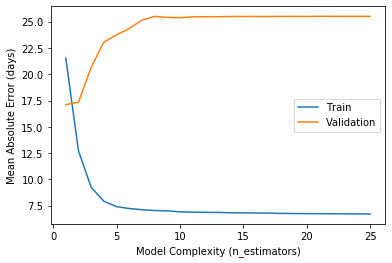

In [23]:
# Chart results of first attempt at XGBoost Parameter tuning
import matplotlib.pyplot as plt
results = model.evals_result()
train_error = results['validation_0']['mae']
val_error = results['validation_1']['mae']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Mean Absolute Error (days)')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend()
plt.show()

In [44]:
# Print validation metrics for best iteration of XGBoost
print('Validation Metrics for Best Validation Iteration of XGBRegressor')
print('Train R^2', model.score(X_train_encoded, y_train))
#y_pred = model.predict(X_train_encoded)
mae = results['validation_0']['mae'][model.best_iteration]
print(f'Train Mean Absolute Error: {mae:.2f} days\n')

print('Validation R^2', model.score(X_val_encoded, y_val))
#y_pred = model.predict(X_val_encoded)
mae = results['validation_1']['mae'][model.best_iteration]
print(f'Validation Mean Absolute Error: {mae:.2f} days')

Validation Metrics for Best Validation Iteration of XGBRegressor
Train R^2 0.40578004717882177
Train Mean Absolute Error: 21.53 days

Validation R^2 0.14793191232064484
Validation Mean Absolute Error: 17.11 days


In [81]:
# Print validation metrics for best iteration of 2nd edition of XGBoost
results = model.evals_result()

print('Validation Metrics for Best Validation Iteration of XGBRegressor')
print('Train R^2', model.score(X_train_encoded, y_train))
#y_pred = model.predict(X_train_encoded)
mae = results['validation_0']['mae'][model.best_iteration]
print(f'Train Mean Absolute Error: {mae:.2f} days\n')

print('Validation R^2', model.score(X_val_encoded, y_val))
#y_pred = model.predict(X_val_encoded)
mae = results['validation_1']['mae'][model.best_iteration]
print(f'Validation Mean Absolute Error: {mae:.2f} days')

Validation Metrics for Best Validation Iteration of XGBRegressor
Train R^2 0.16415584717404552
Train Mean Absolute Error: 25.94 days

Validation R^2 -0.19797807938788892
Validation Mean Absolute Error: 21.03 days


### Get Model's Permutation Importances

In [47]:
import eli5
from eli5.sklearn import PermutationImportance

# Calculate permutation importances
permuter = PermutationImportance(
    model,
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=7
)

permuter.fit(X_val_encoded, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.5,
                                             max_delta_step=0, max_depth=5,
                                             min_child_weight=1, missing=None,
                                             n_estimators=1000, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                     

In [82]:
# Fit permuter for second version of XGBoost
import eli5
from eli5.sklearn import PermutationImportance

# Calculate permutation importances
permuter = PermutationImportance(
    model,
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=7
)

permuter.fit(X_val_encoded, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.5,
                                             max_delta_step=0, max_depth=5,
                                             min_child_weight=1, missing=None,
                                             n_estimators=1000, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg='squarederror',
                                             reg_alpha=0, reg_lambda=1,
                                     

In [48]:
# Get feature importances
feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

SOURCE_1            -0.010246
LATITUDE            -0.001879
CREATION TIME_281   -0.000538
CREATION TIME_625    0.000000
CREATION TIME_838    0.000000
                       ...   
CREATION TIME_410    0.000000
LONGITUDE            0.000000
COUNCIL DISTRICT     0.002342
CREATION MONTH       1.438058
CLOSED MONTH         5.131912
Length: 1275, dtype: float64

In [50]:
# Get permutation importances
eli5.show_weights(
    permuter,
    top=30,
    feature_names=feature_names
)

Weight,Feature
5.1319 ± 0.2923,CLOSED MONTH
1.4381 ± 0.2144,CREATION MONTH
0.0023 ± 0.0018,COUNCIL DISTRICT
0 ± 0.0000,CREATION TIME_390
0 ± 0.0000,CREATION TIME_419
0 ± 0.0000,CREATION TIME_418
0 ± 0.0000,CREATION TIME_417
0 ± 0.0000,CREATION TIME_416
0 ± 0.0000,CREATION TIME_415
0 ± 0.0000,CREATION TIME_414


In [83]:
# Get permutation importances for second round of XGBoost
feature_names = X_val_encoded.columns.tolist()
eli5.show_weights(
    permuter,
    top=30,
    feature_names=feature_names
)

Weight,Feature
1.4422 ± 0.2908,CREATION MONTH
0.5314 ± 0.2626,WORK GROUP_2
0.0623 ± 0.0775,LONGITUDE
0.0136 ± 0.0791,LATITUDE
0.0099 ± 0.0028,ZIP CODE_25
0.0000 ± 0.0002,CREATION TIME_286
0 ± 0.0000,CREATION TIME_420
0 ± 0.0000,CREATION TIME_419
0 ± 0.0000,CREATION TIME_418
0 ± 0.0000,CREATION TIME_417


In [51]:
X_val_encoded.columns

Index(['SOURCE_1', 'SOURCE_2', 'SOURCE_3', 'SOURCE_4', 'SOURCE_5', 'SOURCE_6',
       'SOURCE_7', 'SOURCE_8', 'WORK GROUP_1', 'WORK GROUP_2',
       ...
       'COUNTY_4', 'COUNCIL DISTRICT', 'POLICE DISTRICT_1',
       'POLICE DISTRICT_2', 'POLICE DISTRICT_3', 'POLICE DISTRICT_4',
       'POLICE DISTRICT_5', 'POLICE DISTRICT_6', 'LATITUDE', 'LONGITUDE'],
      dtype='object', length=1275)

### Make exploratory visualizations

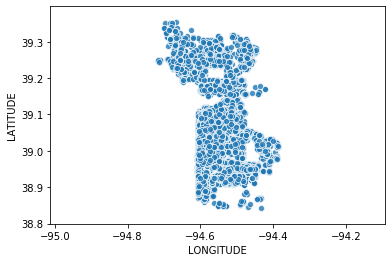

In [65]:
# Visualize latitude against longitude 
import seaborn as sns
plt.axis('equal')
#fig
sns.scatterplot(x=X_train['LONGITUDE'], 
                y=X_train['LATITUDE'], 
                alpha=.8);

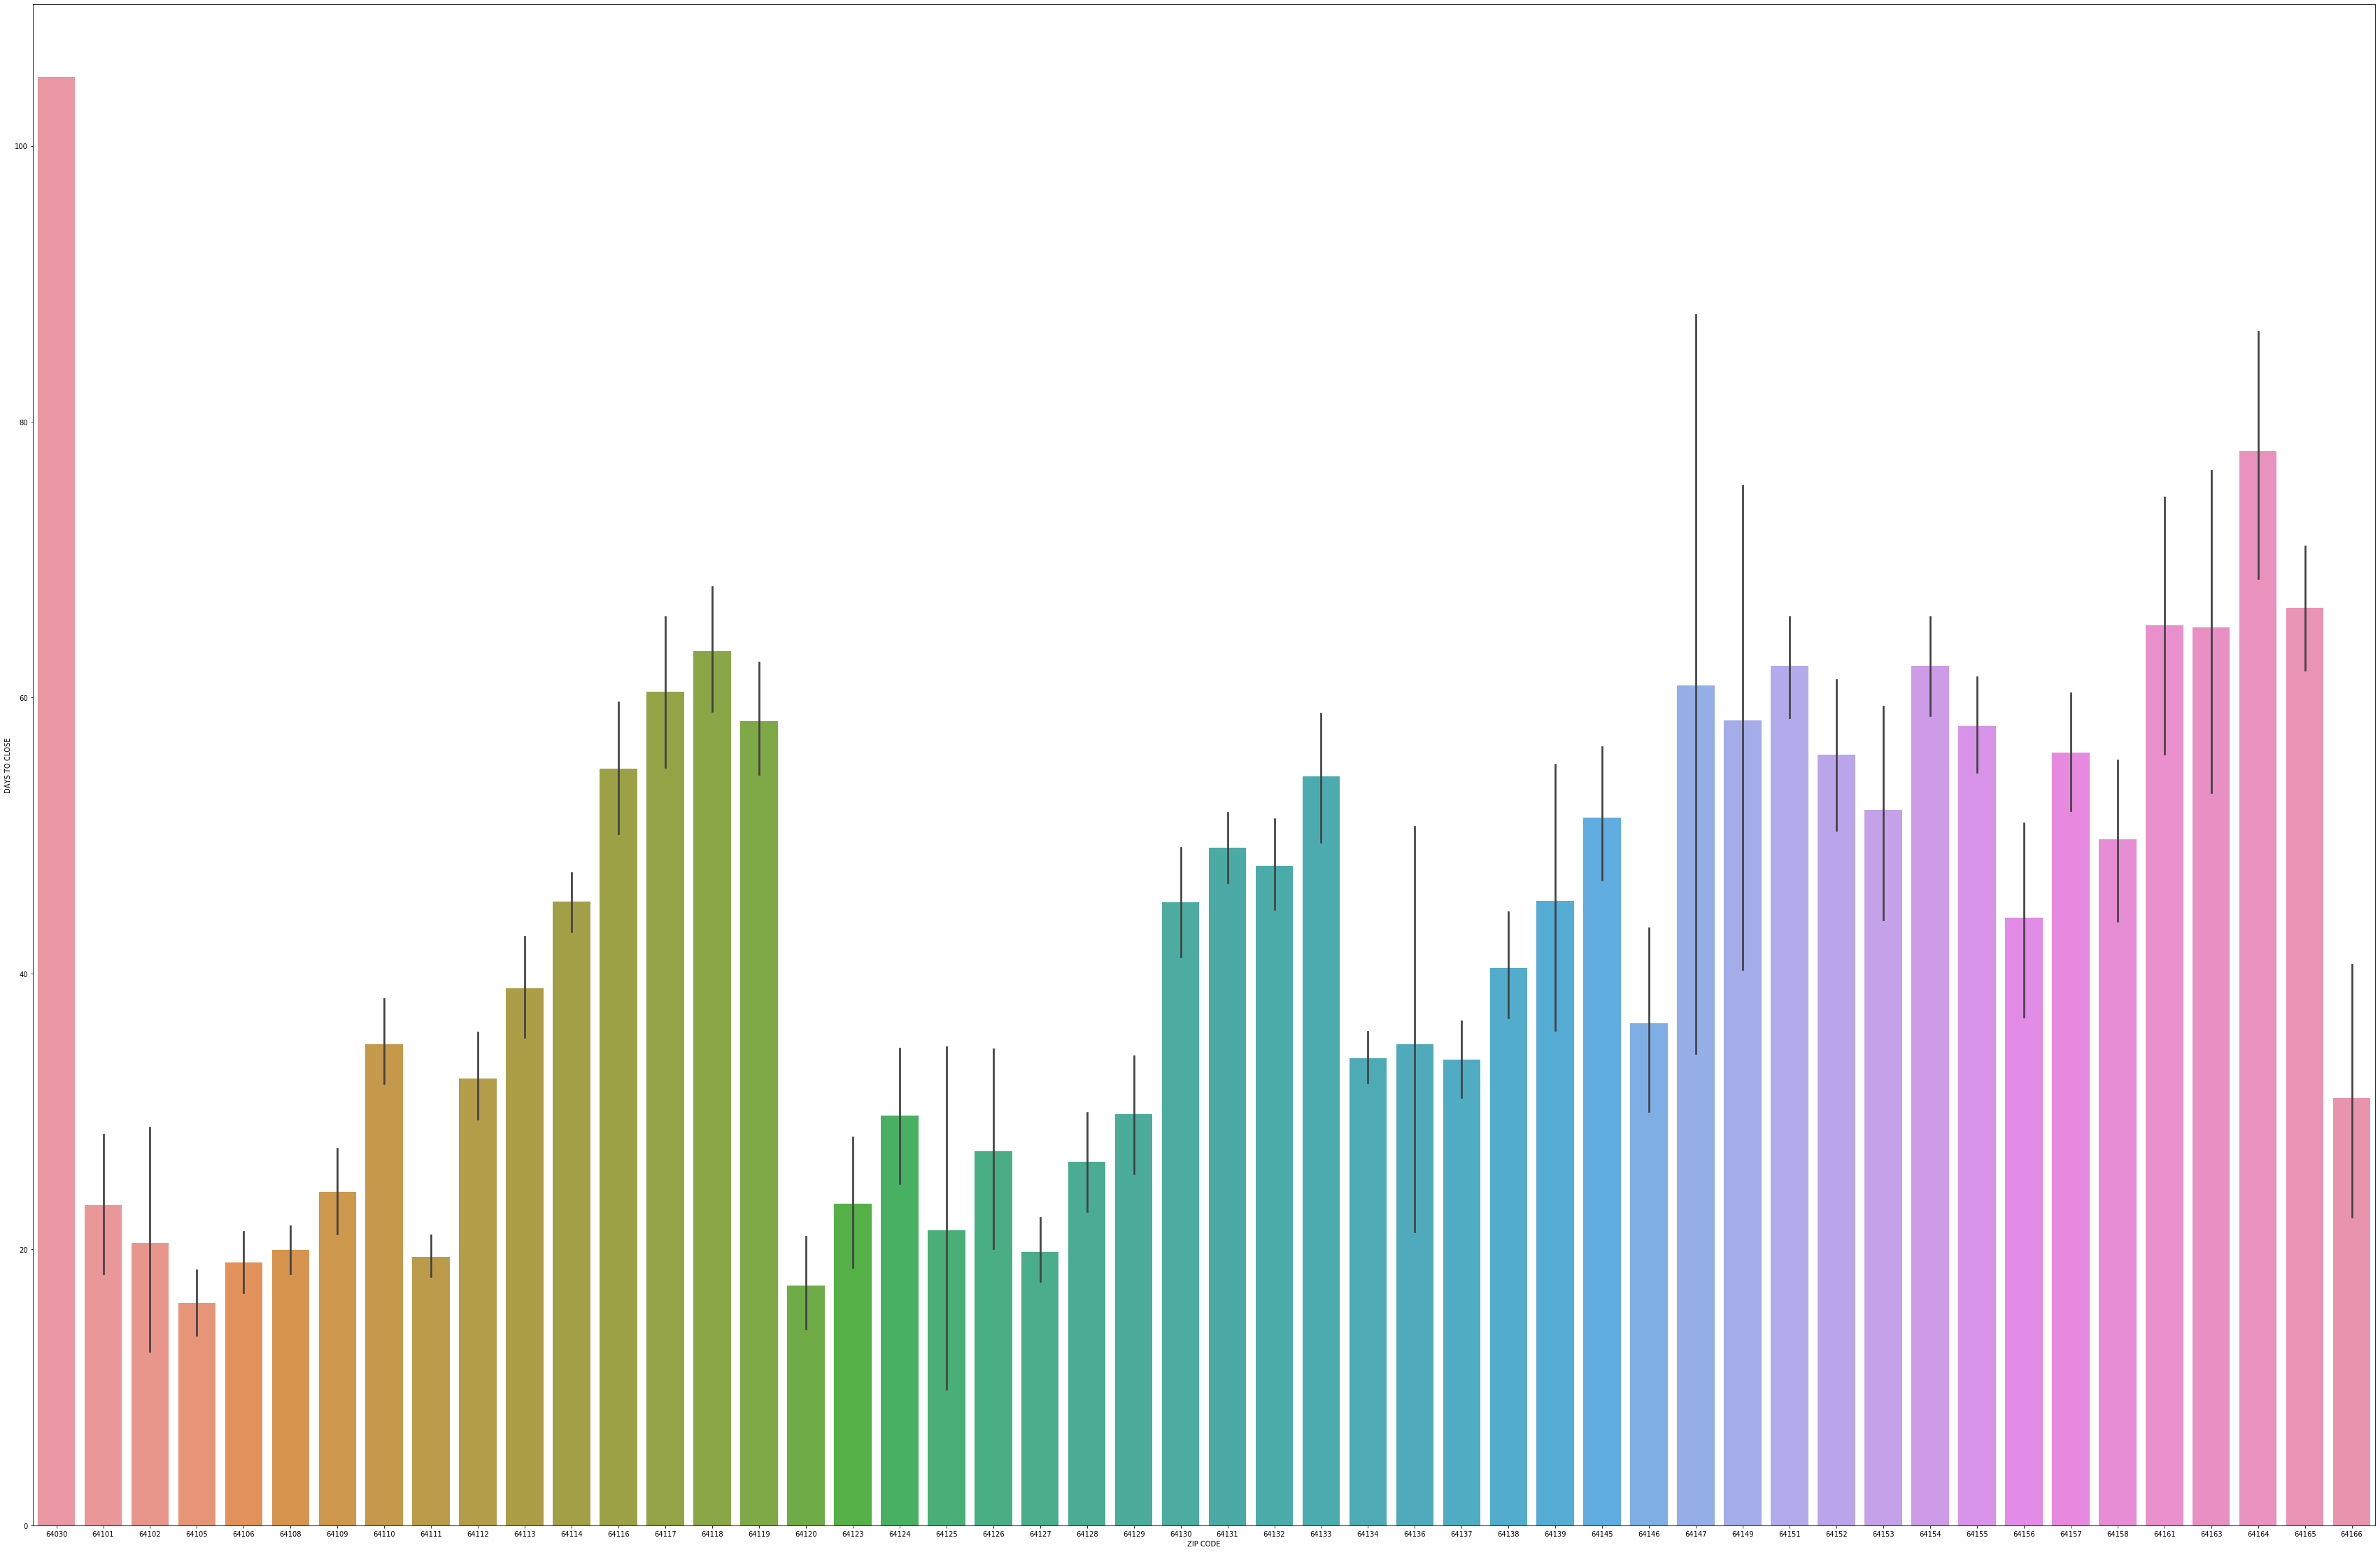

In [93]:
# Visualize DAYS TO CLOSE by ZIP CODE
fig, ax = 
plt.figure(figsize=(60,40))
sns.barplot(x=X_train['ZIP CODE'], y=y_train);


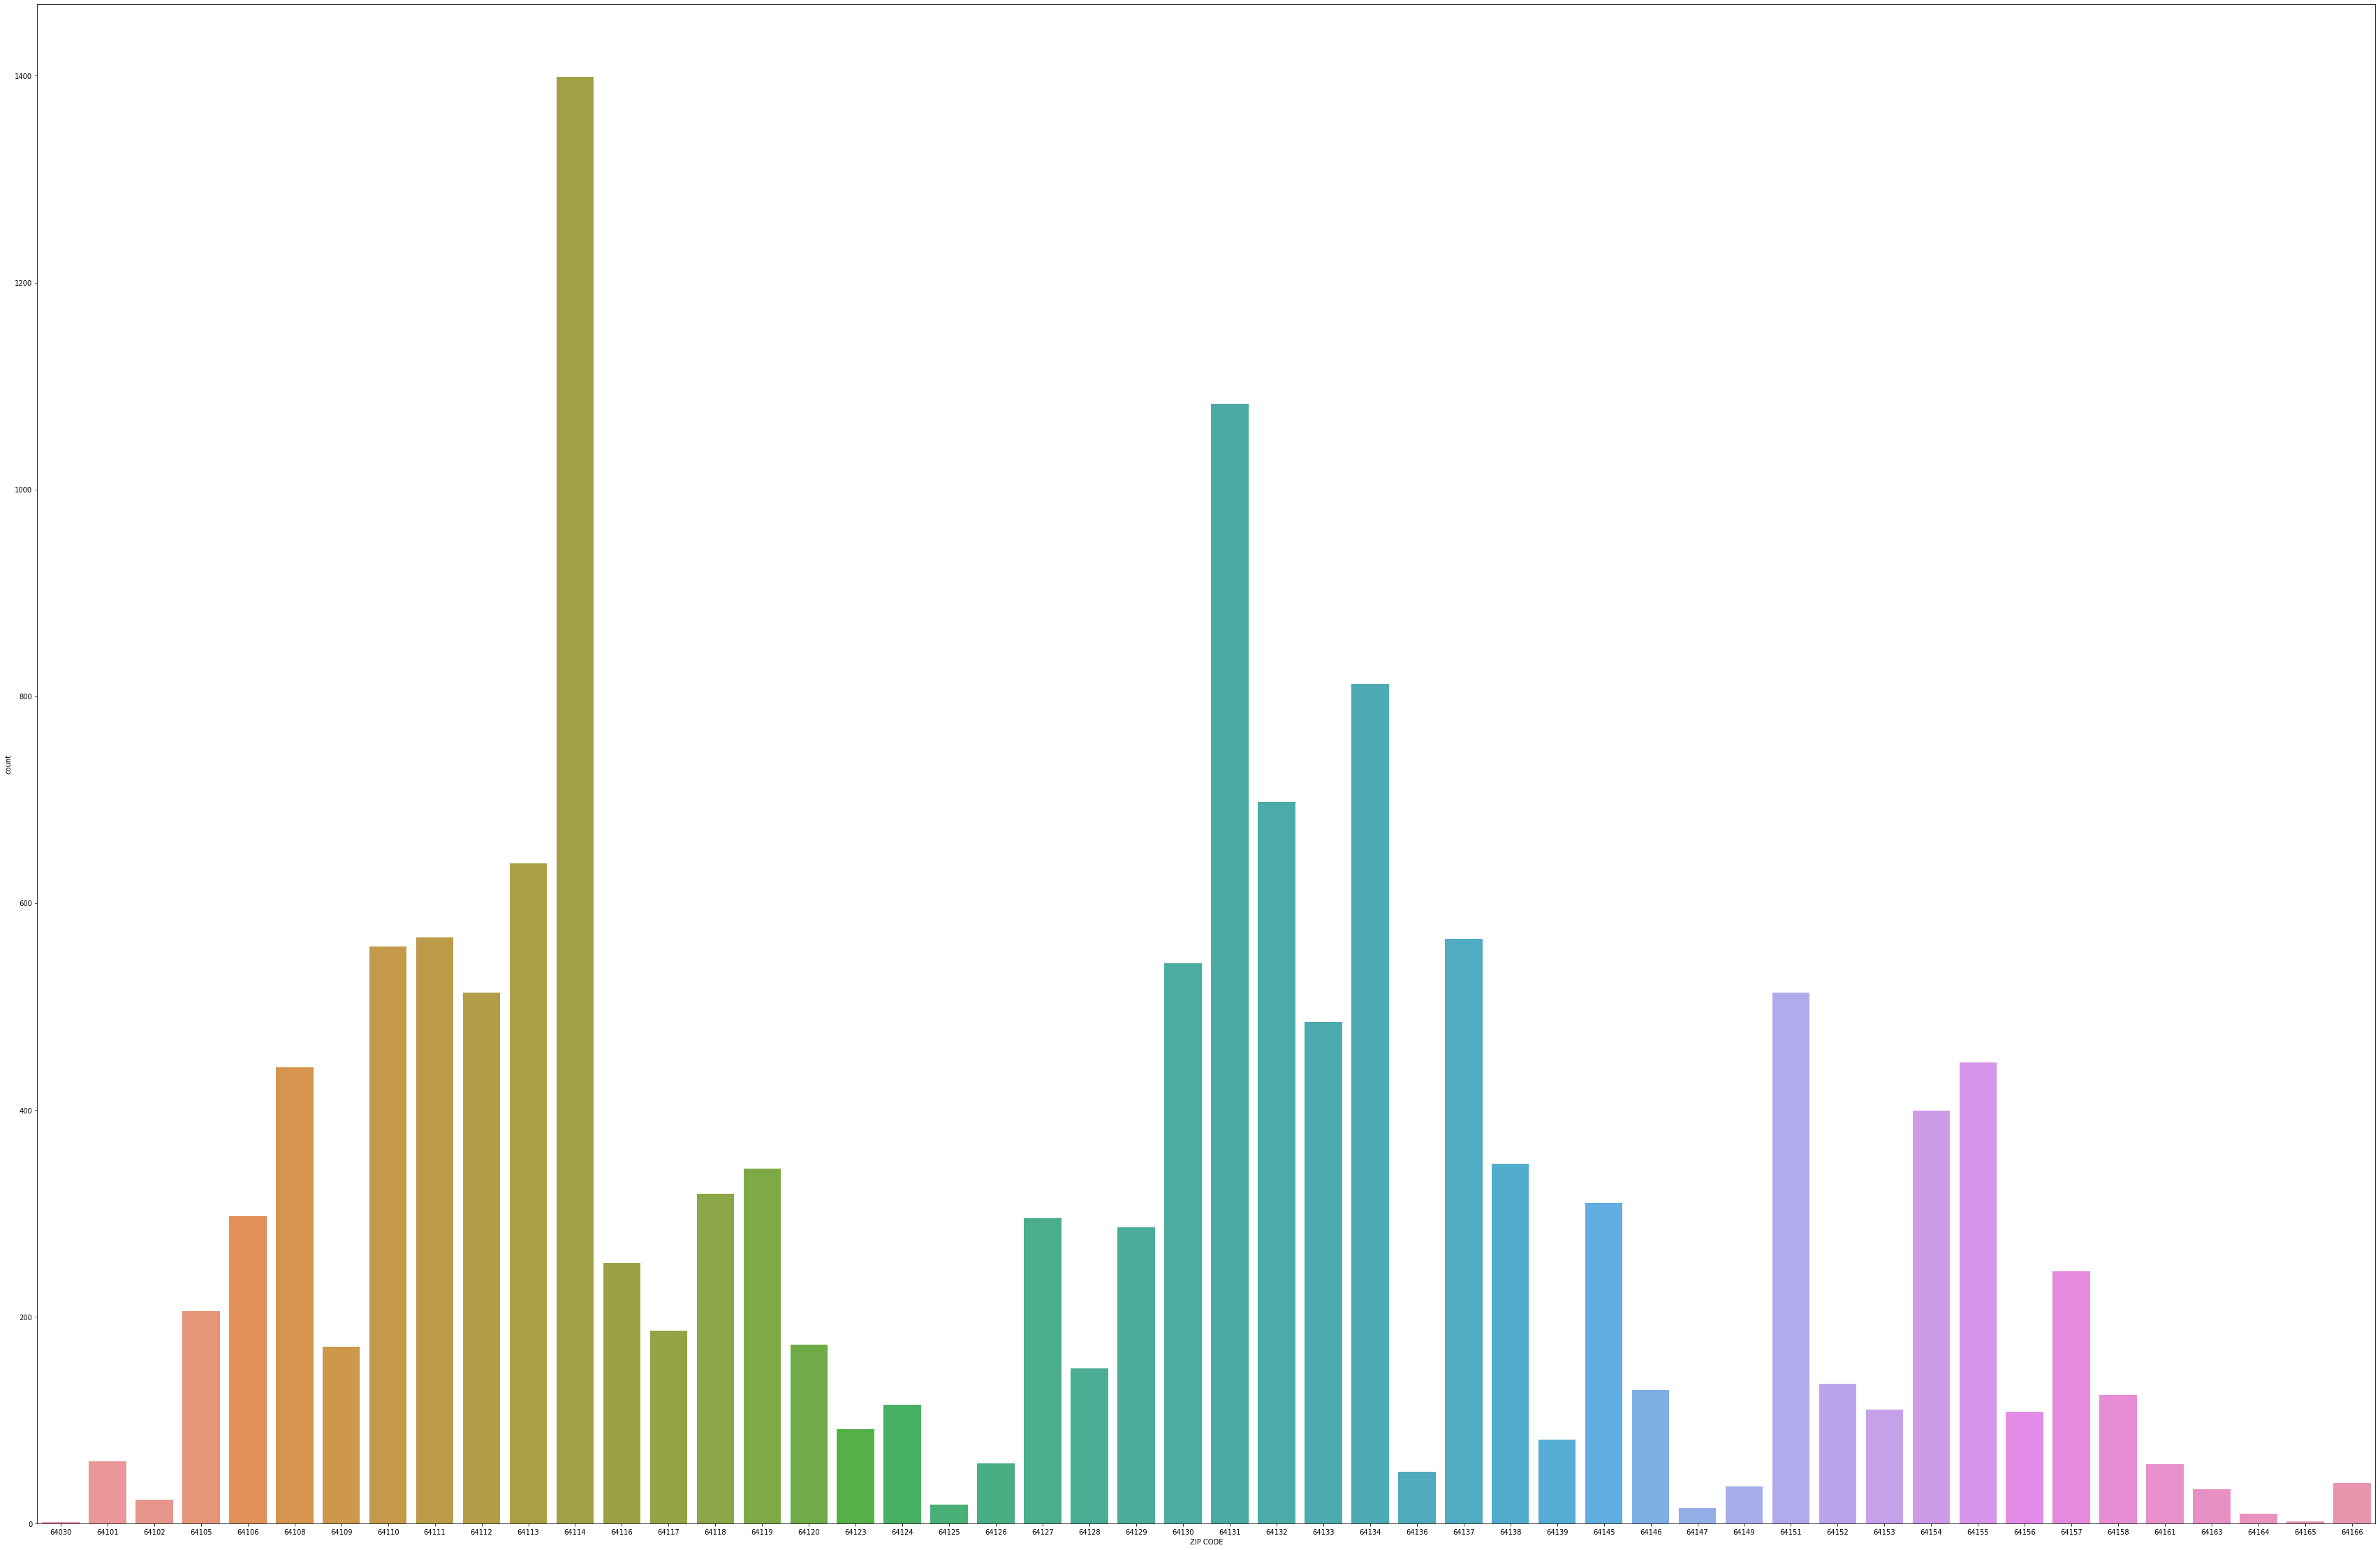

In [102]:
# Visualize number of reports by zip code
plt.figure(figsize=(60,40))
sns.countplot(x='ZIP CODE', data=X_train);

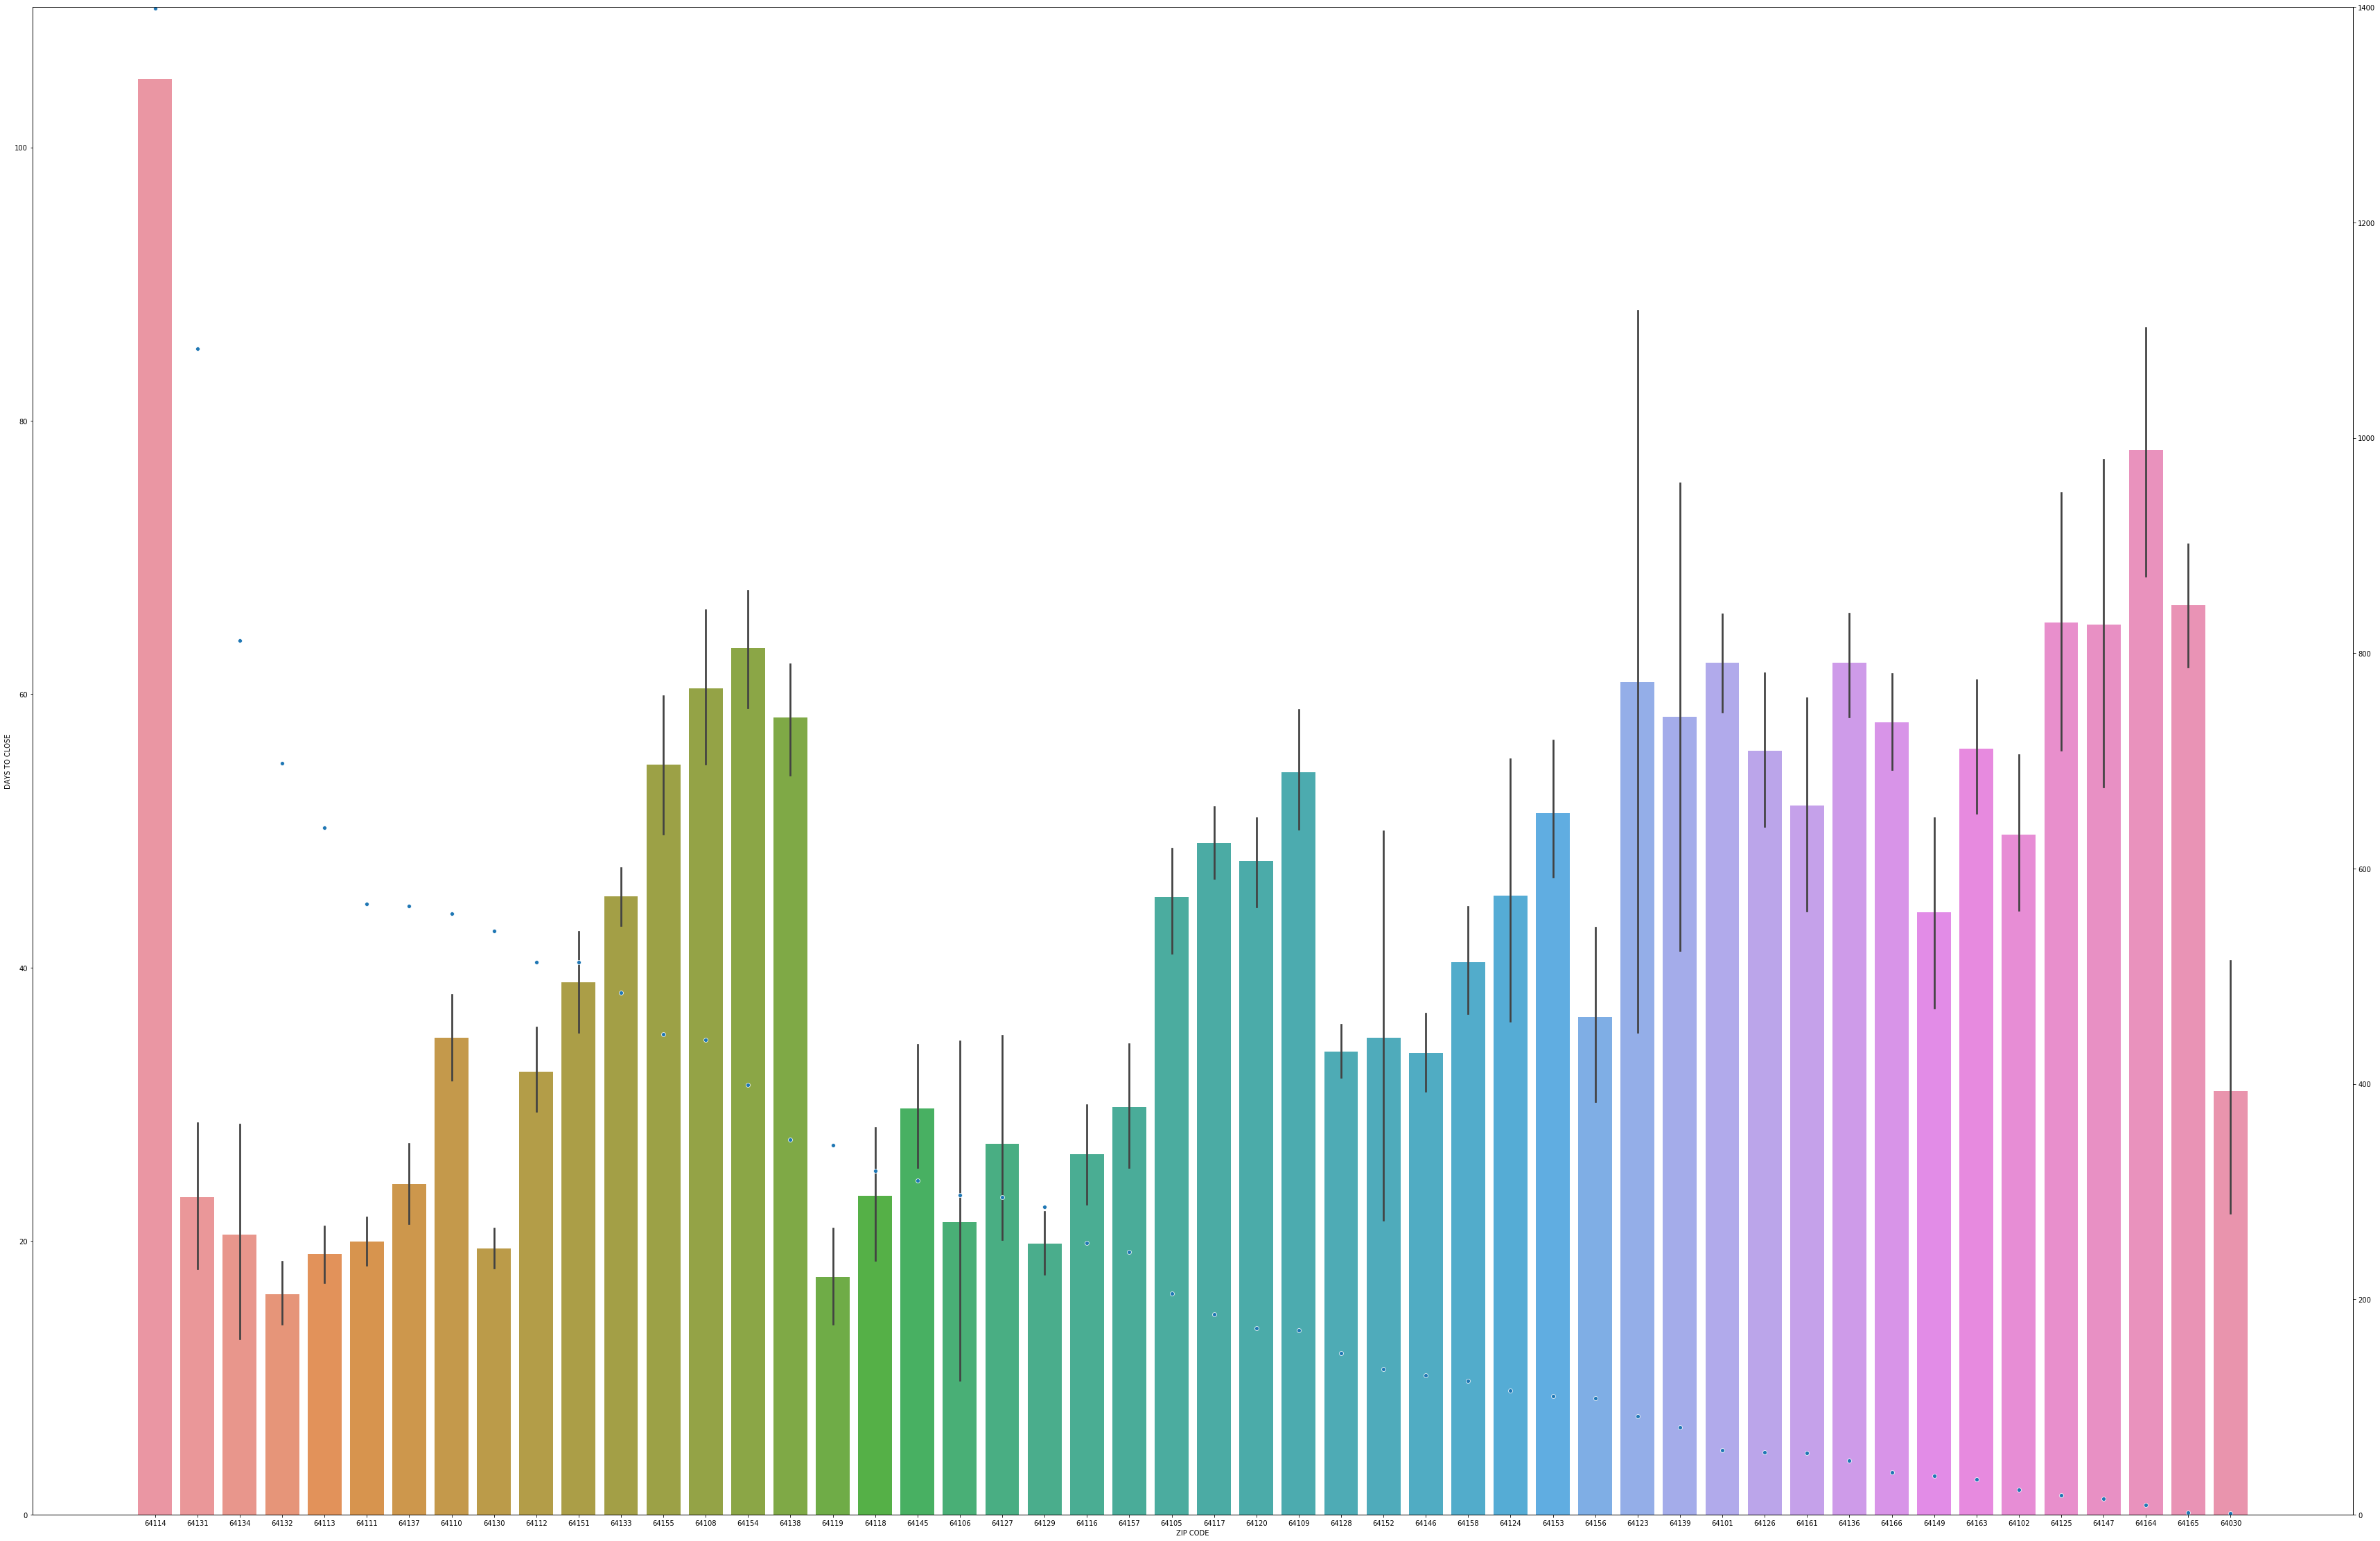

In [71]:
# Attempt to combine the above visualizations into one

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(60,40))
sns.barplot(x=X_train['ZIP CODE'], y=y_train)
ax2 = plt.twinx()
ax2.set_ylim(0, 1400)
sns.scatterplot(data=X_train['ZIP CODE'].value_counts(), size=100, ax=ax2)

legend=True;

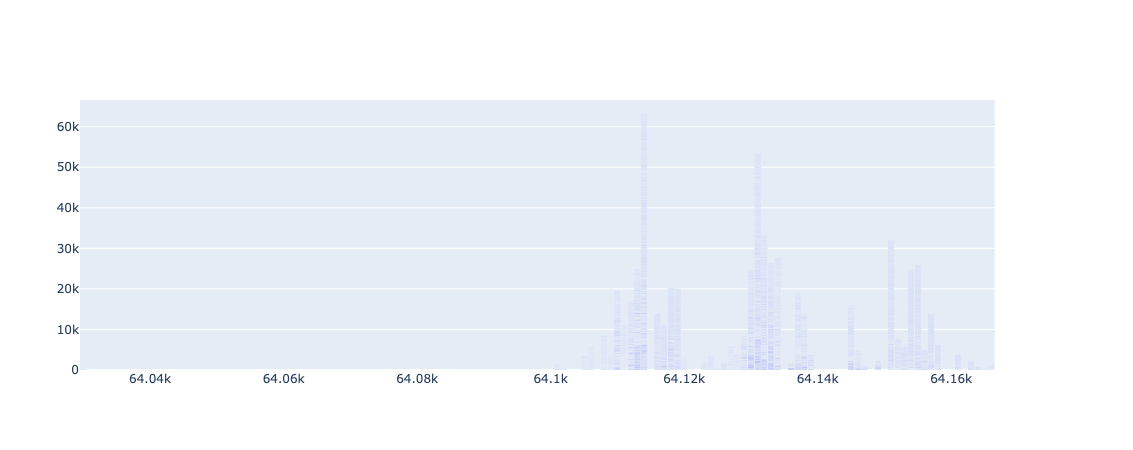

In [37]:
# Failed plotly graph

# Visualize ZIP CODE by both count & days to close
#!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
        go.Bar(x=X_train['ZIP CODE'], y=y_train,
              name='Days to Close'), secondary_y=False
)

# fig.add_trace(
#     go.Bar(x=train_wrangled['ZIP CODE'], 
#            y=train_wrangled['ZIP CODE'].value_counts().tolist(),
#           name='Number of Reports'), secondary_y=True
#)

fig.show()